In [7]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#from src.helper import accuracy_scores
from helper import accuracy_scores
from helper import plot_roc_curve
from confusion_df import render_mpl_table
from confusion_df import confusion_df

from sklearn.decomposition import NMF
from sklearn.cluster import KMeans

plt.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
df=pd.read_csv('../data/GabHateCorpus_annotations.tsv', sep='\t')

In [3]:
"""
LABELS

Hate 
attack on human dignity(HD)
call for violence (CV)
basis of religion (REL), 
race/ethnicity (RAE), 
sexual orientation (SXO), 
ideology (IDL), 
nationality (NAT),
political affiliation (POL), 
and mental or physical health status (MPH). 
rhetoric is explicit (EX) or implicit (IM)
"""

'\nLABELS\n\nHate \nattack on human dignity(HD)\ncall for violence (CV)\nbasis of religion (REL), \nrace/ethnicity (RAE), \nsexual orientation (SXO), \nideology (IDL), \nnationality (NAT),\npolitical affiliation (POL), \nand mental or physical health status (MPH). \nrhetoric is explicit (EX) or implicit (IM)\n'

In [4]:
df.info()

NameError: name 'df' is not defined

In [11]:
df[df['Hate']==1].count()

ID           11249
Annotator    11249
Text         11249
Hate         11249
HD           11249
CV           11249
VO           11249
REL          11249
RAE          11249
SXO          11249
GEN          11249
IDL          11249
NAT          11249
POL          11249
MPH          11249
EX           11249
IM           11249
dtype: int64

In [4]:
df.rename(columns={'HD':'attacks_human_dignity',
                          'CV':'call_for_violence',
                          'VO':'vulgar_offensive_language',
                          'REL':'religion',
                          'RAE':'race_ethnicity',
                          'SXO':'sexual_orientation',
                          'GEN':'gender',
                          'IDL':'ideology',
                          'NAT':'nationality',
                          'POL':'political_affiliation',
                          'MPH':'mental_physical_health_status',
                          'EX':'explicit_rhetoric',
                          'IM':'implicit_rhetoric'}, 
                 inplace=True)

In [5]:
df.head()

,ID,Annotator,Text,Hate,attacks_human_dignity,call_for_violence,vulgar_offensive_language,religion,race_ethnicity,sexual_orientation,gender,ideology,nationality,political_affiliation,mental_physical_health_status,explicit_rhetoric,implicit_rhetoric
0,27044,4,Ah the PSYOPS antifa crew is back. That’s how ...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27044,15,Ah the PSYOPS antifa crew is back. That’s how ...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27044,10,Ah the PSYOPS antifa crew is back. That’s how ...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27044,8,Ah the PSYOPS antifa crew is back. That’s how ...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27045,4,Get the new Android app update released today ...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
totals = df.groupby(df['Hate']).mean().loc[1]
totals

ID                               14003.257090
Annotator                            5.782025
attacks_human_dignity                0.947906
call_for_violence                    0.081607
vulgar_offensive_language            0.369722
religion                             0.181172
race_ethnicity                       0.232110
sexual_orientation                   0.049604
gender                               0.071829
ideology                             0.143124
nationality                          0.140012
political_affiliation                0.246511
mental_physical_health_status        0.027914
explicit_rhetoric                    0.560583
implicit_rhetoric                    0.346697
Name: 1, dtype: float64

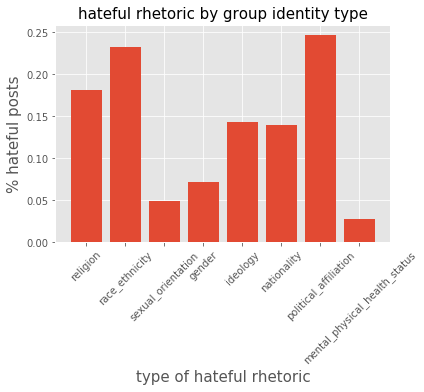

In [44]:
fig,ax = plt.subplots()
#labels =['Hate','HD','CV','VO','REL','RAE','SXO','GEN','IDL','NAT','POL','MPH','EX','IM']
#labels =['REL','RAE','SXO','GEN','IDL','NAT','POL','MPH']
labels = ['religion','race_ethnicity','sexual_orientation','gender','ideology','nationality','political_affiliation','mental_physical_health_status']
ax.bar(labels,totals[labels])
ax.set_title('hateful rhetoric by group identity type', fontsize=15)
ax.set_xlabel('type of hateful rhetoric', fontsize=15)
ax.set_ylabel('% hateful posts', fontsize=15)
for tick in ax.get_xticklabels():
        tick.set_rotation(45)

fig.savefig('img/hate_type_bar.png', bbox_inches='tight');

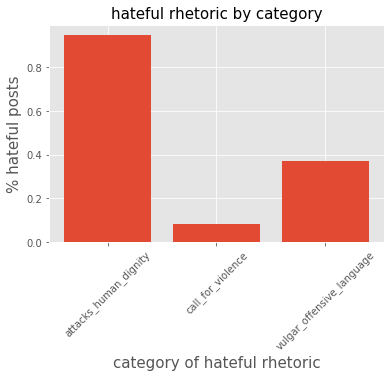

In [45]:
fig,ax = plt.subplots()
labels = ['attacks_human_dignity','call_for_violence','vulgar_offensive_language']
ax.bar(labels,totals[labels])
ax.set_title('hateful rhetoric by category', fontsize=15)
ax.set_xlabel('category of hateful rhetoric', fontsize=15)
ax.set_ylabel('% hateful posts', fontsize=15)
for tick in ax.get_xticklabels():
        tick.set_rotation(45)

fig.savefig('img/hate_category_bar.png', bbox_inches='tight');

In [9]:
sum(df['call_for_violence']==1)  #918 posts with call for violence out of 86529 posts

918

In [10]:
len(df['call_for_violence'])

86529

In [11]:
sum((df['call_for_violence']==1) & (df['religion']==1)) #156 of 86529 posts about religion call for violence

156

In [12]:
df_viol_rel = df[(df['call_for_violence']==1) & (df['religion']==1)]

In [13]:
df['violence_and_religion']=(df['call_for_violence']==1) & (df['religion']==1)

In [14]:
df['violence_and_race_ethnicity']=(df['call_for_violence']==1) & (df['race_ethnicity']==1) #159 of 86529 posts about religion call for violence

In [15]:
sum(df['violence_and_race_ethnicity'])

159

In [16]:
df['violence_and_political_affiliation']=(df['call_for_violence']==1) & (df['political_affiliation']==1)

In [17]:
sum(df['violence_and_political_affiliation'])  #157 of 86529 posts about religion call for violence

157

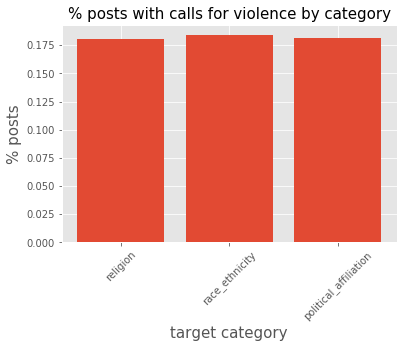

In [46]:
fig,ax = plt.subplots()
#labels = 
ax.bar(['religion','race_ethnicity','political_affiliation'],[100*156/86529,100*159/86529,100*157/86529])
ax.set_title('% posts with calls for violence by category', fontsize=15)
ax.set_xlabel('target category', fontsize=15)
ax.set_ylabel('% posts', fontsize=15)
for tick in ax.get_xticklabels():
        tick.set_rotation(45)

fig.savefig('img/violence_category_bar.png', bbox_inches='tight');

In [19]:
df[df['violence_and_religion']==1].loc[1742]['Text'] #example of call to violence again a religion

"It's time to purge the entire landmass of the United States of the plague that is the Jewish pedophile population https://twitter.com/michaelianblack/status/1020869... They hate our right to bear arms more than SEX WITH CHILDREN I wouldn't mind seeing these vermin Hunger Gamed. Put them in a pit, tell them to hunt each other down"

# Classifier model for calls to violence

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
document_tfidf_matrix = vectorizer.fit_transform(df['Text'])

In [21]:
X = document_tfidf_matrix
y = df['violence_and_religion']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
model_lr_violence_religion = LogisticRegression().fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
model_lr_violence_religion.predict_proba(X_test)

array([[0.9985481 , 0.0014519 ],
       [0.99855486, 0.00144514],
       [0.99739953, 0.00260047],
       ...,
       [0.99841111, 0.00158889],
       [0.99846335, 0.00153665],
       [0.9980564 , 0.0019436 ]])

In [25]:
y_predict_LR_violence = [int(p[1] > 0.5) for p in model_lr_violence_religion.predict_proba(X_test)]

In [26]:
accuracy_score(y_test, y_predict_LR_violence)

0.998266497168612

# NMF

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
document_tfidf_matrix = vectorizer.fit_transform(df_viol_rel['Text'])

In [36]:
V = document_tfidf_matrix

nmf = NMF(n_components=10)
nmf.fit(V)
W = nmf.transform(V)
H = nmf.components_

In [37]:
vocab = np.array(sorted(vectorizer.vocabulary_))

In [38]:
for idx, topic in enumerate(H):
    print(vocab[np.argsort(-topic)[:15]])

['we' 'and' 'are' 'the' 'them' 'all' 'out' 'rabbi' 'in' 'have' 'with' 'of'
 'not' 'jews' 'need']
['akxfs8vdu2q' 'gays' 'mainstream' 'youtu' 'murder' 'muslims' 'https' 'be'
 'on' 'of' 'sweden' 'would' 'will' 'non' 'to']
['you' 'do' 'muslims' 'have' 'has' 'to' 'what' 'it' 'if' 'so' 'today'
 'shoot' 'my' 're' 'about']
['asses' 'alive' 'throw' 'five' 'story' 'queers' 'building' 'like' 'off'
 'muslim' 'do' 'their' 'to' 'the' 'mozlem']
['immediately' 'barbaric' 'shot' 'civilization' 'satanism' 'akbar'
 'allahu' 'shouting' 'known' 'anyone' 'islam' 'place' 'should' 'there'
 'no']
['vdare' 'penalty' 'death' 'the' 'articles' 'young' 'violent' 'gene'
 'pool' 'improved' 'removing' 'article' 'men' 'european' 'via']
['exterminate' 'moslims' 'reason' 'wherever' 'find' 'simply' 'them' 'that'
 'all' 'you' 'is' 'to' 'this' 'vermin' 'vile']
['their' 'jihadists' 'ornamental' 'sword' 'knife' 'carry' 'law' 'because'
 'the' 'is' 'killing' 'goatfuckers' 'small' 'custom' 'guns']
['the' 'of' 'to' 'they' 'in' 'i

# Clustering

In [ ]:
cluster = KMeans(n_clusters=6)
cluster.fit(tfidf_matrix)
centroids = cluster.cluster_centers_

# Naive Bayes classifier

In [30]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model_NB = GaussianNB()

# Train the model using the training sets
model_nb_violence_religion = model_NB.fit(X_train.toarray(), y_train)

#Predict Output
predicted= model_NB.predict(X_test) # 0:Overcast, 2:Mild
#print(f'Predicted Value:, {predicted}')

KeyboardInterrupt: 